# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cur_url = f"{url}{city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(cur_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | dzhalagash
Processing Record 6 of Set 1 | labrador city
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | butiama
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | ta`u
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,23.99,94,75,5.14,CC,1722813895
1,hermanus,-34.4187,19.2345,10.05,65,80,6.76,ZA,1722813607
2,adamstown,-25.0660,-130.1015,21.30,78,91,7.87,PN,1722813897
3,stanley,54.8680,-1.6985,15.40,92,40,3.09,GB,1722813898
4,dzhalagash,45.0833,64.6667,24.88,28,1,2.78,KZ,1722813899


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,94,75,5.14,CC,1722813895
1,hermanus,-34.4187,19.2345,10.05,65,80,6.76,ZA,1722813607
2,adamstown,-25.0660,-130.1015,21.30,78,91,7.87,PN,1722813897
3,stanley,54.8680,-1.6985,15.40,92,40,3.09,GB,1722813898
4,dzhalagash,45.0833,64.6667,24.88,28,1,2.78,KZ,1722813899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

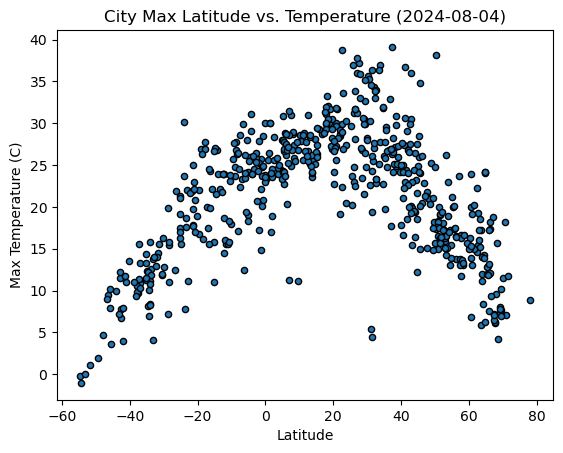

In [9]:

# Build scatter plot for latitude vs. temperature
city_data_df.plot("Lat","Max Temp",kind="scatter",edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

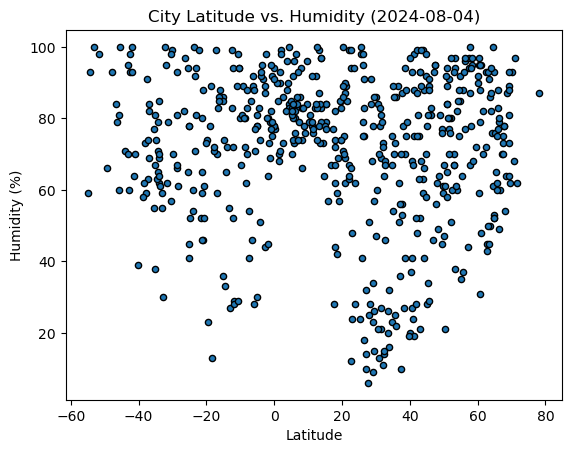

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot("Lat","Humidity",kind="scatter",edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

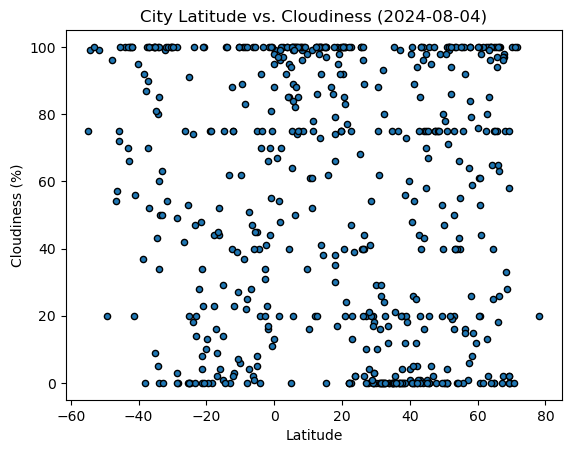

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot("Lat","Cloudiness",kind="scatter",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

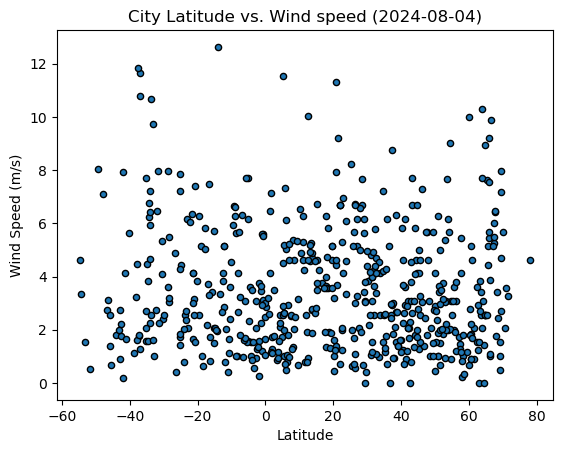

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot("Lat","Wind Speed",kind="scatter",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind speed (2024-08-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values = x * slope + intercept

    eq = f"y = {slope:.2f}x + {intercept:.2f}"
    print(f"The r^2-value is: {rvalue}")


    plt.annotate(eq, (x.min(),y.max()),color="red")
    plt.plot(x,regress_values,color="red")

    plt.scatter(x,y)     
    plt.title(f"Latitude vs {y.name}")
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.show()
        

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,stanley,54.8680,-1.6985,15.40,92,40,3.09,GB,1722813898
4,dzhalagash,45.0833,64.6667,24.88,28,1,2.78,KZ,1722813899
5,labrador city,52.9463,-66.9114,15.95,67,75,5.36,CA,1722813611
7,bethel,41.3712,-73.4140,24.38,88,54,0.89,US,1722813903
10,iqaluit,63.7506,-68.5145,5.85,86,100,2.57,CA,1722813906


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,94,75,5.14,CC,1722813895
1,hermanus,-34.4187,19.2345,10.05,65,80,6.76,ZA,1722813607
2,adamstown,-25.0660,-130.1015,21.30,78,91,7.87,PN,1722813897
6,puerto natales,-51.7236,-72.4875,1.08,98,99,0.54,CL,1722813901
8,butiama,-1.7667,33.9667,17.21,64,66,0.27,TZ,1722813904


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6549534869925249


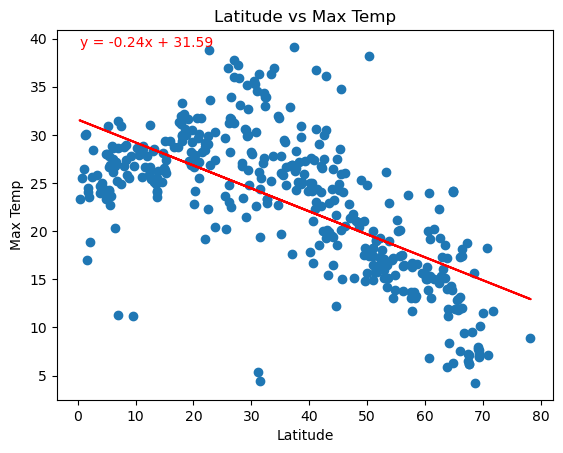

In [16]:
# Linear regression on Northern Hemisphere
north_hemi_temp = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


The r^2-value is: 0.830211458355867


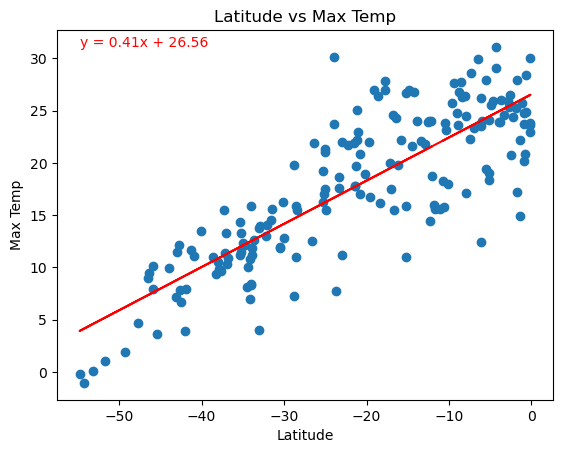

In [17]:
# Linear regression on Southern Hemisphere
south_hemi_temp = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** The southern hemisphere has a noticable correlation between latitude and the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.05586446360732892


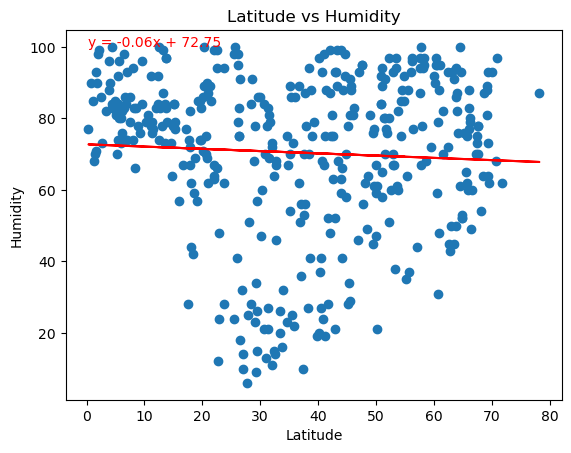

In [18]:
# Northern Hemisphere
north_hemi_humidity = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r^2-value is: -0.016044817627662907


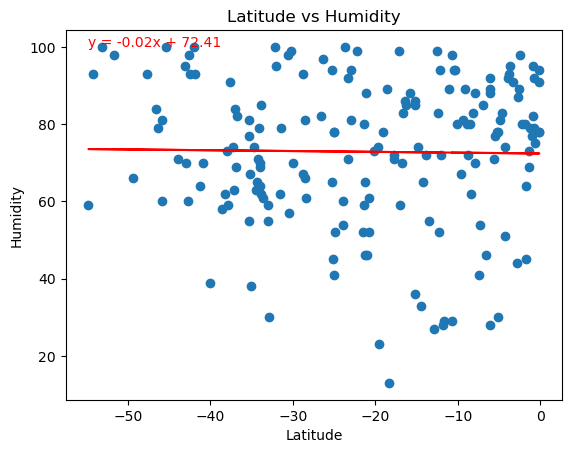

In [19]:
# Southern Hemisphere
south_hemi_humidity = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is no correlation between latitude and how humid it is.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.1825740040701993


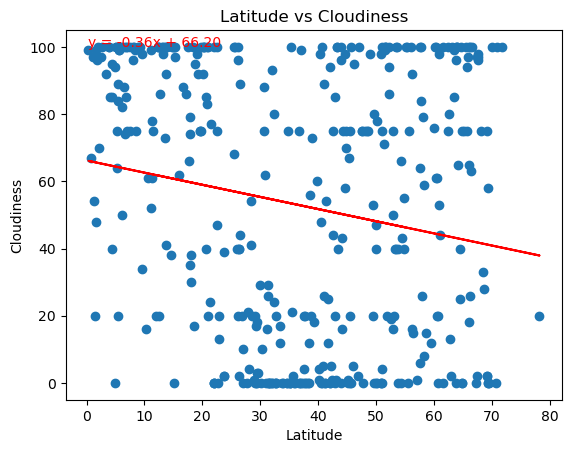

In [20]:
# Northern Hemisphere
north_hemi_cloudiness = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r^2-value is: -0.24571328853178695


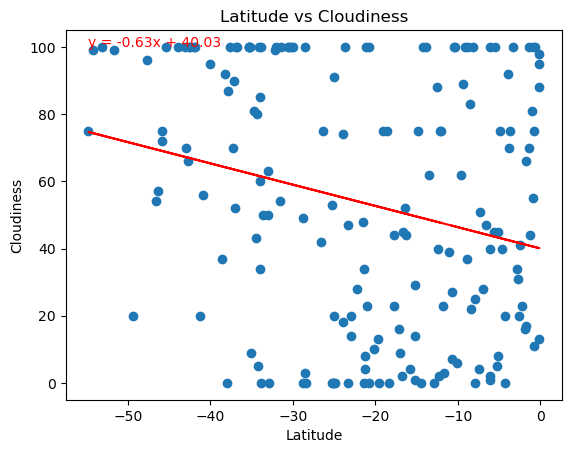

In [21]:
# Southern Hemisphere
south_hemi_cloudiness = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is no correlation between the latitude and how cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.01300878971487007


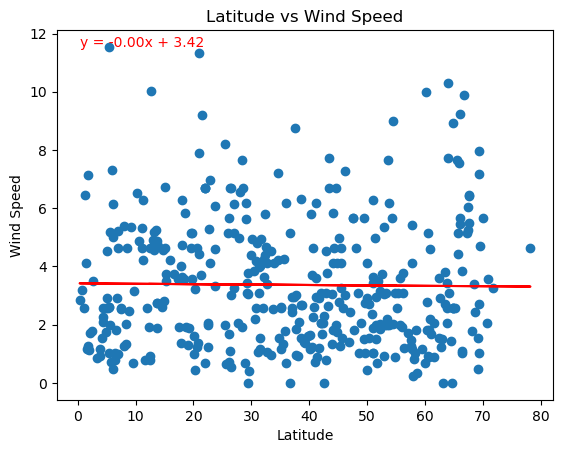

In [23]:
# Northern Hemisphere
north_hemi_wind = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r^2-value is: -0.13549488666593715


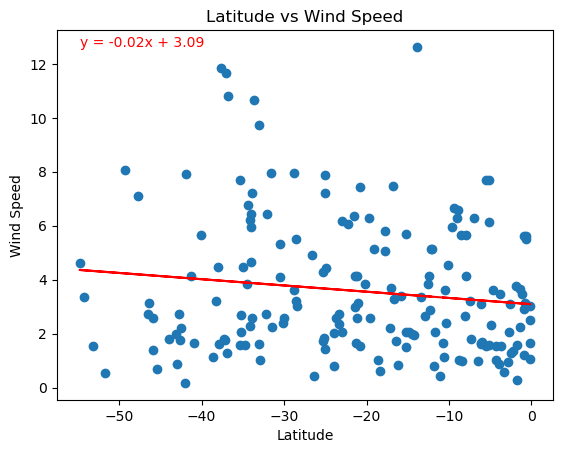

In [24]:
# Southern Hemisphere
south_hemi_wind = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is no correlation between latitude and the wind speed.